<a href="https://colab.research.google.com/github/anjanaperepi/learning/blob/main/Yes_Bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('YesBank_StockPrices.csv')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, Jul-05 to Nov-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2+ KB
None


In [ ]:
print(df.head())

         Open   High    Low  Close
Date                              
Jul-05  13.00  14.00  11.25  12.46
Aug-05  12.58  14.88  12.55  13.42
Sep-05  13.48  14.87  12.27  13.30
Oct-05  13.20  14.47  12.40  12.99
Nov-05  13.35  13.88  12.88  13.41


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

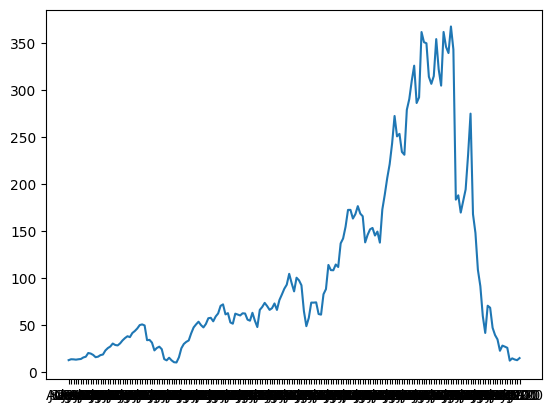

In [ ]:
plt.plot(df.index, df['Close'], label='Closing Price')

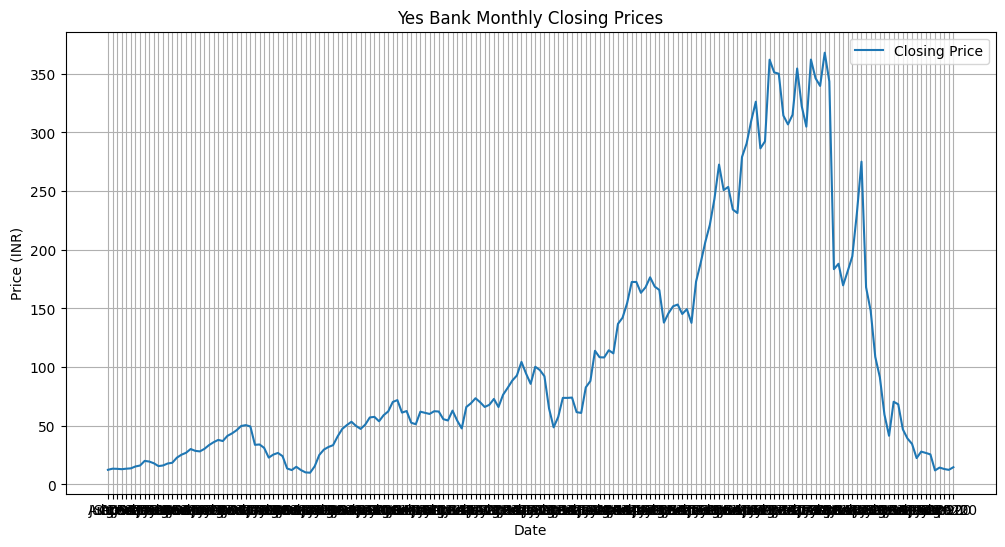

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Yes Bank Monthly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

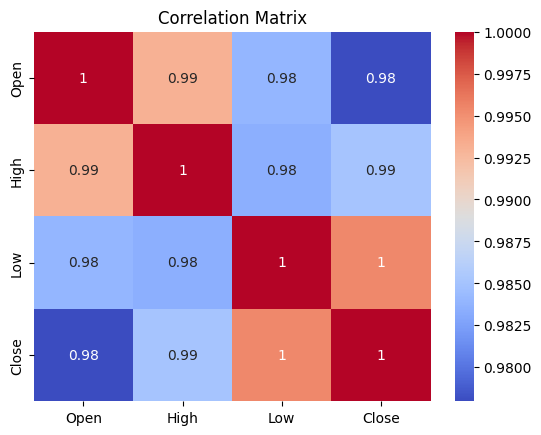

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Prev_Close'] = df['Close'].shift(1)

In [ ]:
df['Rolling_Mean_Close'] = df['Close'].rolling(window=3).mean()

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
features = ['Prev_Close', 'Rolling_Mean_Close']
X = df[features]
y = df['Close']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 206.62994504521455


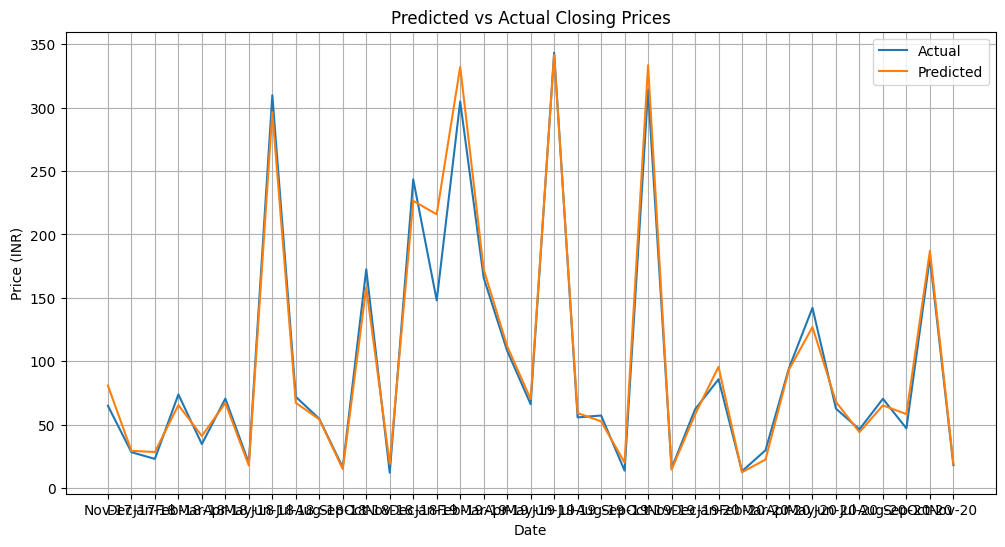

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.title('Predicted vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()